In [1]:
from create_data import DumbCirc as dc
from dklsuq import DeepKernelSUQ as dklu
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data_instance = dc(0.5, 0.5, 0.25)
fc, pc, tc = data_instance.create_dataset(4, 2, [50], [0.2], True)

In [3]:
import torch
fc, pc, tc = torch.tensor(fc), torch.tensor(pc), torch.tensor(tc)

/tmp/ipykernel_16857/2979240048.py:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1711403246168/work/torch/csrc/utils/tensor_new.cpp:275.)
  fc, pc, tc = torch.tensor(fc), torch.tensor(pc), torch.tensor(tc)


In [4]:
fc.size()

torch.Size([8, 140, 2])

In [5]:
pc.size()

torch.Size([8, 35, 2])

In [6]:
model = dklu(point_cloud=fc, partial_cloud=pc, test_partial=tc)

In [7]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model.set_device(device)

In [8]:
model.set_test_data(tc)

In [9]:
model.train_diagonal()

/servers/ash/hdd-home3/dghosh/Documents/Thesis/1notebooks/dklsuq.py:137: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1711403246168/work/aten/src/ATen/native/TensorShape.cpp:3637.)
  + posterior_mean.T @ torch.linalg.inv(posterior_diag) @ posterior_mean)


Epoch: 0, Loss: 0.803493
Epoch: 1, Loss: 0.833426
Epoch: 2, Loss: 0.817757
Epoch: 3, Loss: 0.814289
Epoch: 4, Loss: 0.802491
Epoch: 5, Loss: 0.802870
Epoch: 6, Loss: 0.810376
Epoch: 7, Loss: 0.802342
Epoch: 8, Loss: 0.785046
Epoch: 9, Loss: 0.788708
Epoch: 10, Loss: 0.798746
Epoch: 11, Loss: 0.790630
Epoch: 12, Loss: 0.774308
Epoch: 13, Loss: 0.785646
Epoch: 14, Loss: 0.760732
Epoch: 15, Loss: 0.773972
Epoch: 16, Loss: 0.756746
Epoch: 17, Loss: 0.767037
Epoch: 18, Loss: 0.731393
Epoch: 19, Loss: 0.745787


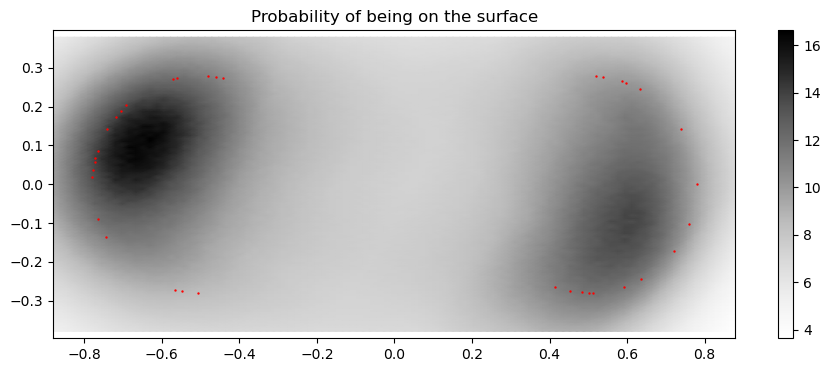

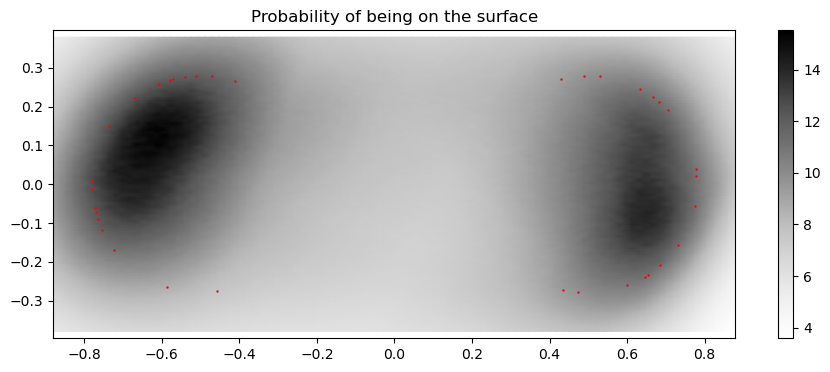

In [10]:
model.predict()